In [24]:
import numpy as np  

check = np.random.rand(16,10)

print(check)
print(check.shape)



[[0.63068238 0.10528633 0.50724691 0.90402593 0.23177352 0.1060827
  0.81757145 0.43041111 0.50747363 0.52456967]
 [0.94134081 0.61856151 0.7249676  0.74041837 0.82622575 0.96030831
  0.65877593 0.0141585  0.13764135 0.43842228]
 [0.65935382 0.53188772 0.43009701 0.02639425 0.19559776 0.45791244
  0.46213123 0.13341594 0.35455842 0.74782746]
 [0.96123109 0.39596772 0.55444482 0.43754746 0.50803822 0.36626983
  0.21353502 0.63663723 0.88239724 0.91720666]
 [0.78150668 0.46390011 0.40441424 0.69104336 0.65203648 0.83428362
  0.30976678 0.34551758 0.23010951 0.10000867]
 [0.34320151 0.33995115 0.5779391  0.07902931 0.79917113 0.57612412
  0.37395045 0.49839783 0.77891936 0.96342968]
 [0.94374485 0.44748521 0.40947966 0.45404745 0.49739247 0.97781903
  0.77129017 0.75507653 0.46459603 0.09689964]
 [0.30757596 0.14174732 0.22157345 0.8344797  0.822133   0.37559859
  0.95279651 0.56731553 0.10361898 0.59337725]
 [0.04803424 0.75912885 0.04360835 0.99195344 0.96446964 0.27301631
  0.79073681 

In [3]:
import numpy as np
w = np.array([0.5,-0.4])
x=np.array([2,3])

z= x.dot(w) + 0.1
print(z)

-0.10000000000000017


In [8]:
print(np.zeros((1,10)))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
class SimNN:
    def __init__(self,input,hidden,output,bias,lr=0.001):
        self.layer = np.random.rand(input,hidden)
        self.bias = np.zeros((1,hidden))
        self.learning_rate = lr 
    

    def relu(slef,x):
        return max(0,x)
    
    def softmax(self,x):
        pass
    

        

In [4]:
import numpy as np

# --- Hyperparameters ---
lr = 0.1     # learning rate
n, m = 2, 3  # input dim=2, hidden dim=3
epochs = 10

# --- Data ---
X = np.array([[2.0, 3.0]])  # input shape (1, n)
y = np.array([[1.0]])       # target shape (1, 1)

# --- Initialize weights ---
np.random.seed(42)
W1 = np.random.randn(n, m) * 0.01   # (2,3)
b1 = np.zeros((1, m))               # (1,3)
W2 = np.random.randn(m, 1) * 0.01   # (3,1)
b2 = np.zeros((1, 1))               # (1,1)

# --- Activation ---
def relu(z):
    return np.maximum(0, z)

def relu_deriv(z):
    return (z > 0).astype(float)

# --- Training loop ---
# for epoch in range(epochs):
#     # Forward pass
#     z1 = X @ W1 + b1     # (1, m)
#     h = relu(z1)         # (1, m)
#     y_hat = h @ W2 + b2  # (1, 1)
#     loss = 0.5 * np.square(y_hat - y)

#     # Backprop
#     dL_dyhat = y_hat - y                    # (1,1)
#     dW2 = h.T @ dL_dyhat                    # (m,1)
#     db2 = dL_dyhat                          # (1,1)

#     dh = dL_dyhat @ W2.T                    # (1,m)
#     dz1 = dh * relu_deriv(z1)               # (1,m)
#     dW1 = X.T @ dz1                         # (n,m)
#     db1 = dz1                               # (1,m)

#     # Update params
#     W2 -= lr * dW2
#     b2 -= lr * db2
#     W1 -= lr * dW1
#     b1 -= lr * db1

#     print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Prediction: {y_hat.item():.4f}")


In [ ]:
import numpy as np  
# --- Initialize weights ---

n,m = 2,3
np.random.seed(42)
W1 = np.random.randn(n, m) * 0.01   # (2,3)
b1 = np.zeros((1, m))               # (1,3)
W2 = np.random.randn(m, 1) * 0.01   # (3,1)
b2 = np.zeros((1, 1))  

X = np.array([[2.0, 3.0]])  # input shape (1, n)
y = np.array([[1.0,0]])       # target shape (1, 1)

print(X,y)

print(W1)

[[2. 3.]] [[1.]]
[[ 0.00496714 -0.00138264  0.00647689]
 [ 0.0152303  -0.00234153 -0.00234137]]


In [126]:
np.random.seed(42)
f = np.random.randint(1,11,size=(3,4))
print(f)
print(np.sum(f,axis=0))
print(np.sum(f,axis=1))

[[ 7  4  8  5]
 [ 7 10  3  7]
 [ 8  5  4  8]]
[22 19 15 20]
[24 27 25]


In [ ]:
class SimpleNN:
    def __init__(self, input_dim, num_neurons):
        # Smaller initialization (scaled by 0.1)
        self.w1 = np.random.randn(input_dim, num_neurons) * 0.1
        self.b1 = np.zeros((1, num_neurons))
        self.w2 = np.random.randn(num_neurons, 1) * 0.1
        self.b2 = np.zeros((1, 1))
        self.Loss = []

    def Relu(self, x):


        return np.maximum(0, x)

    def relu_def(self, x):
        return (x > 0).astype(float)
    

    def Tanh(self, x):
        return np.tanh(x)

    def tanh_def(self, x):
        return 1 - np.tanh(x)**2


    def error(self, actual, esti):
        return 0.5 * (actual - esti) ** 2

    def forward(self, x):
        self.input = x
        self.z1 = self.input.dot(self.w1) + self.b1
        self.h1 = self.Relu(self.z1)
        self.y_hat = self.h1.dot(self.w2) + self.b2
        return self.y_hat

    def backprop(self, target, lr=1e-4):  # smaller learning rate
        loss_val = np.mean(self.error(target, self.y_hat))
        self.Loss.append(loss_val)

        # Output layer
        dl_dyhat = (self.y_hat - target)                    # (batch,1)
        dl_dv = self.h1.T.dot(dl_dyhat) / len(target)       # normalize by batch
        dl_dc = np.sum(dl_dyhat, axis=0, keepdims=True) / len(target)

        # Hidden layer
        delta1 = dl_dyhat.dot(self.w2.T) * self.relu_def(self.z1)
        dl_dw1 = self.input.T.dot(delta1) / len(target)
        dl_db1 = np.sum(delta1, axis=0, keepdims=True) / len(target)

        # Update weights
        self.w2 -= lr * dl_dv
        self.b2 -= lr * dl_dc
        self.w1 -= lr * dl_dw1
        self.b1 -= lr * dl_db1


In [300]:
import numpy as np

class SimpleNN:
    def __init__(self,input_dim,num_neurons,lr=1e-3):
       
        # self.w1 = np.random.randn(input_dim,num_neurons)  * lr
        self.b1 = np.random.rand(1,num_neurons) 
        # self.w2 = np.random.randn(num_neurons,1) * lr
        self.w1 = np.random.randn(input_dim,num_neurons) * np.sqrt(2./input_dim)
        self.w2 = np.random.randn(num_neurons,1) * np.sqrt(2./num_neurons)
        self.b2 = np.random.rand(1,1)
        self.lr = lr
        self.Loss = []

        
    
    def Relu(self,x):
        return np.maximum(0,x)
    
    def relu_def(self,x):
         return (x > 0).astype(float)
    
    def error(self,actual,esti):
        return 0.5 * (actual-esti)**2
    

    def Tanh(self,x):
        return np.tanh(x)
    
    def tanh_def(self,x):
        return 1 - np.tanh(x)**2



    def backprop(self,target):
        loss = np.mean(self.error(target,self.y_hat))
        self.Loss.append(loss)
        dl_dy = self.y_hat - target
        dl_dv = self.h1.T.dot(dl_dy)
        dl_dc = np.sum(dl_dy,axis=0,keepdims=True) #(1,num neurons)

        #hidden layer
        delta1 = dl_dy.dot(self.w2.T) * self.tanh_def(self.z1)
        dl_w1 = self.input.T.dot(delta1)
        dl_db1 = np.sum(delta1,axis=0,keepdims=True)


        #updating weights
        self.w2 -= self.lr * dl_dv
        self.b2 -= self.lr * dl_dc

        self.w1 -= self.lr * dl_w1
        self.b1 -= self.lr * dl_db1



                     
    def forward(self,X):
        self.input = X
        self.z1 = self.input.dot(self.w1) + self.b1 
        # print(self.z1.shape)      
        self.h1 = self.Tanh(self.z1)                          
        self.y_hat = self.h1.dot(self.w2) + self.b2
        return self.y_hat


            
        




    

In [39]:
import numpy as np

class SimpleNN:
    def __init__(self, input_dim, num_neurons,activation='tanh'):
        # Xavier initialization for tanh
        self.activation = activation
        if activation == 'tanh':
            self.w1 = np.random.randn(input_dim, num_neurons) * np.sqrt(1./input_dim)
            self.w2 = np.random.randn(num_neurons, 1) * np.sqrt(1./num_neurons)
        elif activation == 'relu':
            # self.w1 = np.random.randn(input_dim, num_neurons) * np.sqrt(2./input_dim)
            # self.w2 = np.random.randn(num_neurons, 1) * np.sqrt(2./num_neurons)
            self.w1 = np.random.randn(input_dim, num_neurons) * np.sqrt(2./input_dim)
            self.w2 = np.random.randn(num_neurons, 1) * np.sqrt(2./num_neurons)

            

            
        self.b1 = np.zeros((1, num_neurons))
        self.b2 = np.zeros((1, 1))
        self.Loss = []

    # ---- Activation ----
    def Tanh(self, x):
        return np.tanh(x)

    def tanh_grad(self, h):
        return 1 - h**2   # derivative w.r.t tanh output
    
    def Relu(self,x):
        return np.maximum(0,x)
    
    def relu_def(self,x):
         return (x > 0).astype(float)

    # ---- Loss ----
    def error(self, actual, esti):
        return 0.5 * (actual - esti) ** 2

    # ---- Forward ----
    # def forward(self, X):
    #     self.input = X
    #     self.z1 = self.input.dot(self.w1) + self.b1   # (batch, num_neurons)
    #     self.h1 = self.Relu(self.z1)                  # (batch, num_neurons)
    #     self.y_hat = self.h1.dot(self.w2) + self.b2   # (batch, 1)
    #     return self.y_hat

        # ---- Forward ----
    def forward(self, X):
        self.input = X
        self.z1 = self.input.dot(self.w1) + self.b1   # (batch, num_neurons)

        if self.activation == 'tanh':
            self.h1 = self.Tanh(self.z1)
        else:  # relu
            self.h1 = self.Relu(self.z1)

        self.y_hat = self.h1.dot(self.w2) + self.b2   # (batch, 1)
        return self.y_hat


    # # ---- Backprop ----
    # def backprop(self, target):
    #     # Compute loss
    #     loss = np.mean(self.error(target, self.y_hat))
    #     self.Loss.append(loss)

    #     # Output layer
    #     # dl_dy = self.y_hat - target                    # (batch,1)
    #     dl_dy = (self.y_hat - target) / target.shape[0]   

    #     dl_dv = self.h1.T.dot(dl_dy)                   # (num_neurons,1)
    #     dl_dc = np.sum(dl_dy, axis=0, keepdims=True)   # (1,1)

    #     # Hidden layer
    #     # delta1 = dl_dy.dot(self.w2.T) * self.relu_def(self.h1)  # (batch,num_neurons)
    #     delta1 = dl_dy.dot(self.w2.T) * self.relu_def(self.z1)

    #     dl_w1 = self.input.T.dot(delta1)                        # (input_dim,num_neurons)
    #     dl_db1 = np.sum(delta1, axis=0, keepdims=True)          # (1,num_neurons)

    #     # Update weights
    #     self.w2 -= self.lr * dl_dv
    #     self.b2 -= self.lr * dl_dc
    #     self.w1 -= self.lr * dl_w1
    #     self.b1 -= self.lr * dl_db1



    def backprop(self, target, lr=1e-3, clip_norm=1.0):
        m = target.shape[0]
        loss_val = np.mean(0.5 * (target - self.y_hat)**2)
        self.Loss.append(loss_val)

        # output layer
        dl_dy = (self.y_hat - target) / m        # (batch,1) normalized by batch
        dW2 = self.h1.T.dot(dl_dy)               # (num_neurons,1)
        db2 = np.sum(dl_dy, axis=0, keepdims=True)  # (1,1)

        # hidden layer
        dh = dl_dy.dot(self.w2.T)                # (batch, num_neurons)
        if self.activation == 'tanh':
            dz1 = dh * self.tanh_grad(self.z1)
        else:
            dz1 = dh * self.relu_grad(self.z1)

        dW1 = self.input.T.dot(dz1)              # (input_dim, num_neurons)
        db1 = np.sum(dz1, axis=0, keepdims=True) # (1, num_neurons)

        # gradient clipping (per-matrix)
        def clip(g):
            norm = np.linalg.norm(g)
            if norm > clip_norm:
                return g * (clip_norm / (norm + 1e-12))
            return g

        dW2 = clip(dW2); dW1 = clip(dW1)
        db2 = clip(db2); db1 = clip(db1)

        # update
        self.w2 -= lr * dW2
        self.b2 -= lr * db2
        self.w1 -= lr * dW1
        self.b1 -= lr * db1




In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# # Data
# X = np.linspace(-4, 4, 100).reshape(-1, 1)
# Y = (X**2) / 16.0   # normalized targets in [0,1]

# # Model
# nn = SimpleNN(input_dim=1, num_neurons=100, lr=1e-3, activation='tanh')
X = np.linspace(-4, 4, 500).reshape(-1,1)
Y = X ** 2  /8


# normalize X (important)
X_mean, X_std = X.mean(axis=0), X.std(axis=0) + 1e-12
Xn = (X - X_mean) / X_std
nn = SimpleNN(input_dim=1, num_neurons=100,  activation='tanh')

# Training
epochs = 5000
for epoch in range(epochs):
    y_pred = nn.forward(X)
    nn.backprop(Y)

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss = {nn.Loss[-1]:.6f}")

# Plot
plt.figure(figsize=(8,6))
plt.plot(X, Y, label="True $y=x^2$", color="blue")
plt.plot(X, nn.forward(X), label="NN Prediction", color="red", linestyle="--")
plt.legend()
plt.title("Approximating $y=x^2$ with SimpleNN")
plt.xlabel("x")
plt.ylabel("y (normalized)")
plt.grid(True)
plt.show()


TypeError: SimpleNN.__init__() got an unexpected keyword argument 'lr'

Modified version for gpt need to manually implemts myself


0 loss 22.205291115579016
400 loss 0.3440633608682476
800 loss 0.09396466625887803
1200 loss 0.06818773974197
1600 loss 0.031922325214796515
2000 loss 0.009802023128736877
2400 loss 0.008084639923487553
2800 loss 0.007317282005078933
3200 loss 0.005462778256749752
3600 loss 0.002025508082617644


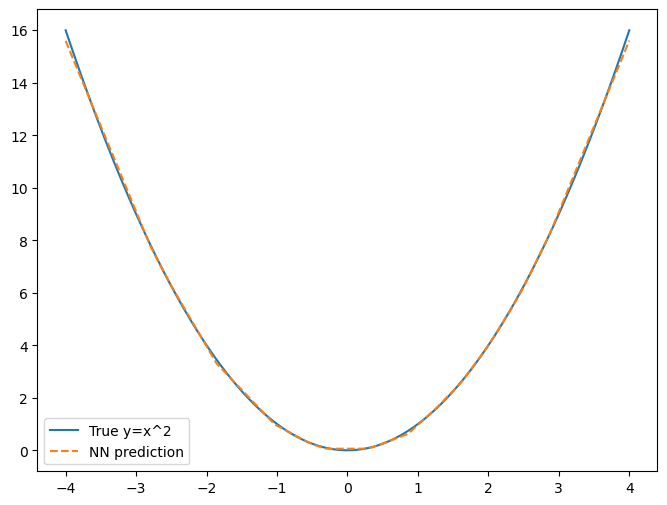

In [33]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN:
    def __init__(self, input_dim, num_neurons, activation='tanh'):
        self.activation = activation
        fan_in, fan_out = input_dim, num_neurons
        # Xavier init (good for tanh); for ReLU use He: * np.sqrt(2/fan_in)
        std1 = np.sqrt(2.0 / (fan_in + fan_out))
        self.w1 = np.random.randn(fan_in, fan_out) * std1
        self.b1 = np.zeros((1, fan_out))
        std2 = np.sqrt(2.0 / (fan_out + 1))
        self.w2 = np.random.randn(fan_out, 1) * std2
        self.b2 = np.zeros((1, 1))
        self.Loss = []

    def forward(self, x):
        self.input = x                       # (batch, input_dim)
        self.z1 = x.dot(self.w1) + self.b1   # (batch, num_neurons)
        if self.activation == 'tanh':
            self.h1 = np.tanh(self.z1)
        else:
            self.h1 = np.maximum(0, self.z1)
        self.y_hat = self.h1.dot(self.w2) + self.b2   # (batch,1)
        return self.y_hat

    def relu_grad(self, z): return (z > 0).astype(float)
    def tanh_grad(self, z): return 1.0 - np.tanh(z)**2

   
    def backprop(self, target, lr=1e-3, clip_norm=1.0):
        m = target.shape[0]
        loss_val = np.mean(0.5 * (target - self.y_hat)**2)
        self.Loss.append(loss_val)

        # output layer
        dL_dy = (self.y_hat - target) / m        # (batch,1) normalized by batch
        dW2 = self.h1.T.dot(dL_dy)               # (num_neurons,1)
        db2 = np.sum(dL_dy, axis=0, keepdims=True)  # (1,1)

        # hidden layer
        dh = dL_dy.dot(self.w2.T)                # (batch, num_neurons)
        if self.activation == 'tanh':
            dz1 = dh * self.tanh_grad(self.z1)
        else:
            dz1 = dh * self.relu_grad(self.z1)

        dW1 = self.input.T.dot(dz1)              # (input_dim, num_neurons)
        db1 = np.sum(dz1, axis=0, keepdims=True) # (1, num_neurons)

        # gradient clipping (per-matrix)
        def clip(g):
            norm = np.linalg.norm(g)
            if norm > clip_norm:
                return g * (clip_norm / (norm + 1e-12))
            return g

        dW2 = clip(dW2); dW1 = clip(dW1)
        db2 = clip(db2); db1 = clip(db1)

        # update
        self.w2 -= lr * dW2
        self.b2 -= lr * db2
        self.w1 -= lr * dW1
        self.b1 -= lr * db1

# ---- data prep ----
X = np.linspace(-4, 4, 500).reshape(-1,1)
Y = X ** 2 


# normalize X (important)
X_mean, X_std = X.mean(axis=0), X.std(axis=0) + 1e-12
Xn = (X - X_mean) / X_std

# model & train
nn = SimpleNN(input_dim=1, num_neurons=50, activation='ReLu')
epochs = 4000
batch_size = 32
lr = 1e-3

for epoch in range(epochs):
    # mini-batch SGD
    perm = np.random.permutation(len(Xn))
    for i in range(0, len(Xn), batch_size):
        idx = perm[i:i+batch_size]
        xb, yb = Xn[idx], Y[idx]
        nn.forward(xb)
        nn.backprop(yb, lr=lr, clip_norm=1.0)

    if epoch % 400 == 0:
        print(epoch, "loss", nn.Loss[-1])

# final predictions (remember to feed normalized X)
Y_pred = nn.forward(Xn)

# plot
plt.figure(figsize=(8,6))
plt.plot(X, Y, label='True y=x^2')
plt.plot(X, Y_pred, '--', label='NN prediction')
plt.legend()
plt.show()


In [ ]:
np.random.randn(1,10)
np.random.rand(1,1)

array([[0.75400846]])

In [ ]:
class john:
    def __init__(self,n,l):
        self.n = n
        self.l = l

    def pri(self,v):
        print(self.n ,' ',v,' ',self.l)
        self.z1 = self.n + ' ' +self.l

    
    def leg(self):
        print(len(self.z1))


p = john('Hasib','Yosufi')

p.pri('khesrow')

p.leg()
    

Hasib   khesrow   Yosufi
12


In [ ]:
sj = np.random.rand(1,16)
sj.flatten()
print(sj)
print(sj.shape)
len(sj[0])


[[0.82561287 0.21377282 0.83530781 0.55611731 0.76572135 0.84880302
  0.46880912 0.72987513 0.90212393 0.19408126 0.24211953 0.18089398
  0.63054466 0.27020122 0.8479145  0.41630082]]
(1, 16)


16

In [ ]:
w1 = np.random.randn(len(sj[0]),10)
print(w1)

[[-0.19676056  0.16468745 -0.5607339   1.12176614 -1.08756729 -0.47916055
   1.12187741  1.03929713  1.10467392 -0.04857982]
 [-0.91589105  0.52584003 -0.27435371 -0.62021767 -1.77368273  0.34618928
  -0.35598258  0.62848684 -0.1310904  -0.33056148]
 [ 0.6478108   0.48655214 -0.99692909 -1.12759586 -0.87386035  0.78793997
   0.69937008  0.30095813 -0.3899366  -0.5683449 ]
 [ 0.02661809 -3.22721494  1.35157811 -0.10780114 -0.3747107  -0.30480217
  -0.91097819 -0.77647777  0.50947325  0.63668326]
 [ 1.54130342  1.02681295 -0.42085492  0.2597463  -0.48352946 -0.26434552
   0.10216859  2.52103253  0.91765373  0.91292789]
 [-2.45682623 -0.08398991  0.24269358  2.01534651 -0.39756909 -0.55528544
   0.60069982 -0.45067194  0.36016177 -0.78679208]
 [ 0.35582381  0.12658794 -1.33221451  0.48256411  0.23349966  0.0325343
   0.49009408  1.0861085   0.58931538  0.07699001]
 [-0.44469301 -1.52464543 -0.82662016  0.2868618  -1.77664394  1.94319569
  -1.08319859 -0.38526992  0.67461749  2.62153648]
 

In [ ]:
b1 = np.random.rand(1,10)
print(b1)

[[0.37136015 0.47849998 0.69728426 0.35779245 0.62526807 0.67768446
  0.12358334 0.80189743 0.94539182 0.89520929]]


In [ ]:
z = sj.dot(w1) + b1

In [ ]:
print(z)


[[ 0.74961423  1.91403196 -4.10821341  4.16096978 -4.9947882  -1.00750881
   1.46829384  3.83396308  4.47444493  3.1153619 ]]


In [ ]:
x = np.array([2,3,4])
wt = np.array([[0.1,0.2,0.3],[1,2,3],[-1,-2,-3]])
bs = np.array([1,2,3])
print(x)
print(x.dot(wt[0])+1,'\n',wt[0])

zj = x.dot(wt.T) + bs
print(zj)

[2 3 4]
3.0 
 [0.1 0.2 0.3]
[  3.  22. -17.]


In [4]:
import torch

x = torch.tensor(2)
t = torch.tensor(4)


m = torch.tensor(3.0,requires_grad=True)
b = torch.tensor(1.0,requires_grad=True)


y = m * x + b

Loss = 0.5 * (y-t)**2

print(f'predeicted is {y} actual is {t}, and loss is {Loss}')



predeicted is 7.0 actual is 4, and loss is 4.5


In [5]:
Loss.backward()

print('Loss : ',Loss.item())
print(f'dl_dw is {m.grad.item()}')
print(f'dl_dw is {b.grad.item()}')


Loss :  4.5
dl_dw is 6.0
dl_dw is 3.0


In [18]:
x,t = torch.tensor(2), torch.tensor(5)

w1,b1 = torch.tensor(1.0,requires_grad=True), torch.tensor(0.0,requires_grad=True)

w2,b2 = torch.tensor(-1.0,requires_grad=True), torch.tensor(1.0,requires_grad=True)

v1,v2,c = torch.tensor(2.0,requires_grad=True), torch.tensor(-3.0,requires_grad=True), torch.tensor(0.0,requires_grad=True)




In [19]:
h1 = w1*x + b1
h2 = w2*x + b2

print(f'h1 is {h1} and h2 is {h2}')
print(c)

h1 is 2.0 and h2 is -1.0
tensor(0., requires_grad=True)


In [20]:
y = (v1 * h1) + (v2 * h2) + c

print(f'y is: {y}')

loss = 0.5 * (y-t)**2
print(loss)

y is: 7.0
tensor(2., grad_fn=<MulBackward0>)


In [21]:
loss.backward()

print(f'loss grads {loss.item()}')
print(f'w1 and b1 is {w1.grad.item()} and b1 grad is {b1.grad.item()}')
print(f'w2 and b2 is {w2.grad.item()} and b1 grad is {b2.grad.item()}')
print(f'v1 and v2 is {v1.grad.item()} and v2 is {v2.grad.item()} c grad is {c.grad.item()}')


loss grads 2.0
w1 and b1 is 8.0 and b1 grad is 4.0
w2 and b2 is -12.0 and b1 grad is -6.0
v1 and v2 is 4.0 and v2 is -2.0 c grad is 2.0


In [22]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
print(params)

tensor([1., 0.], requires_grad=True)
